## selenium
* https://www.selenium.dev/
* 웹브라우저를 이용한 작업들을 자동화할 수 있도록 특수 제작된 브라우저
* requests, bs4로 스크래핑할 수 없는 동적 데이터를 포함하는 웹페이지를
* 원격조작이 가능한 웹브라우저를 이용해서 처리
* downloads -> browsers -> chrome -> 94.~ 버전 -> win32 
* 다운로드한 chromedriver파일을 아래의 경로에 저장

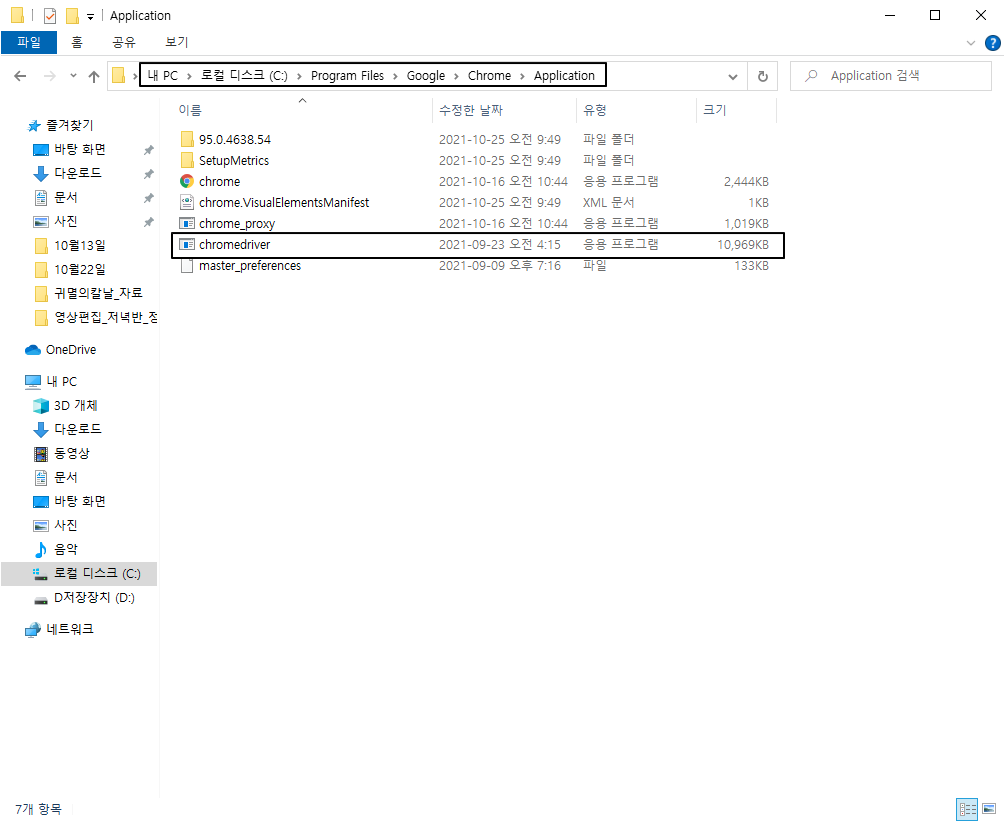

In [4]:
# pip install selenium

In [6]:
# pip install beautifulsoup4

## 주피터로는 실행이 안되기 때문에 파이참으로 수업을 진행

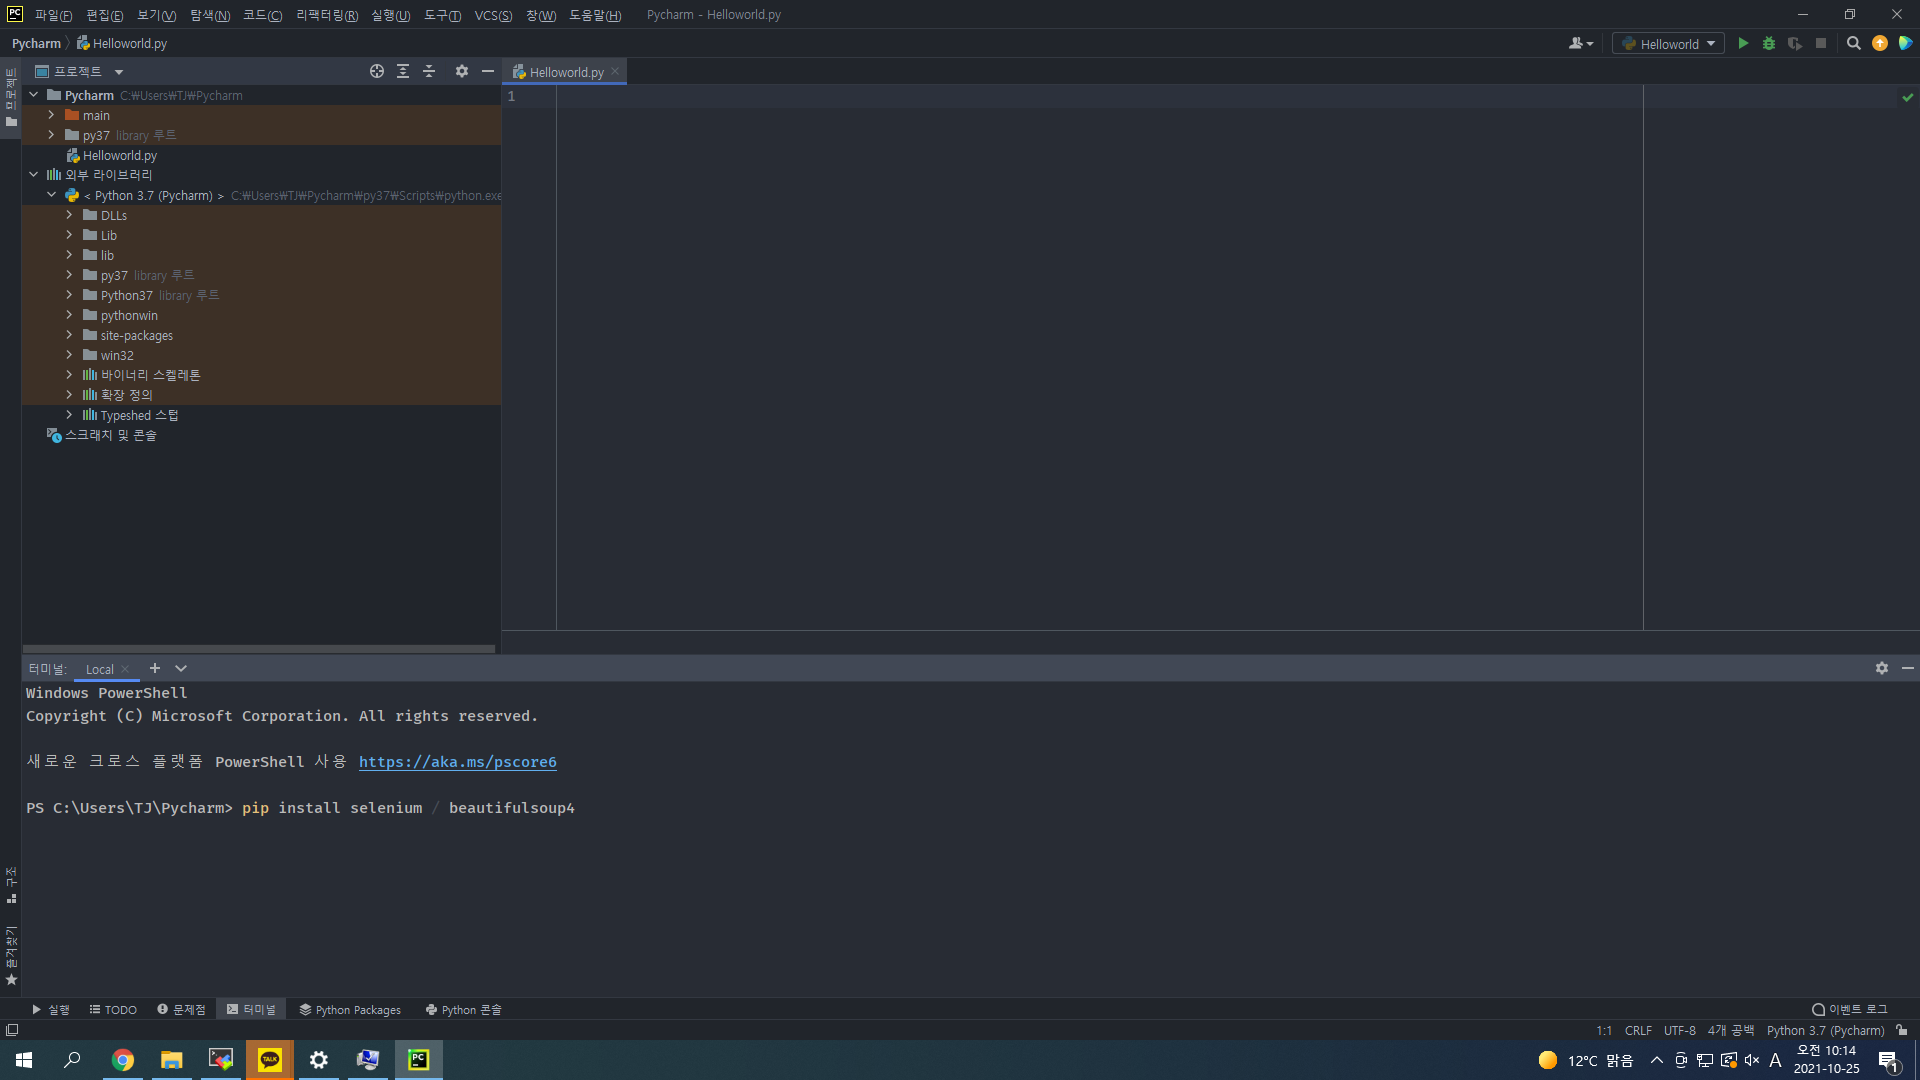

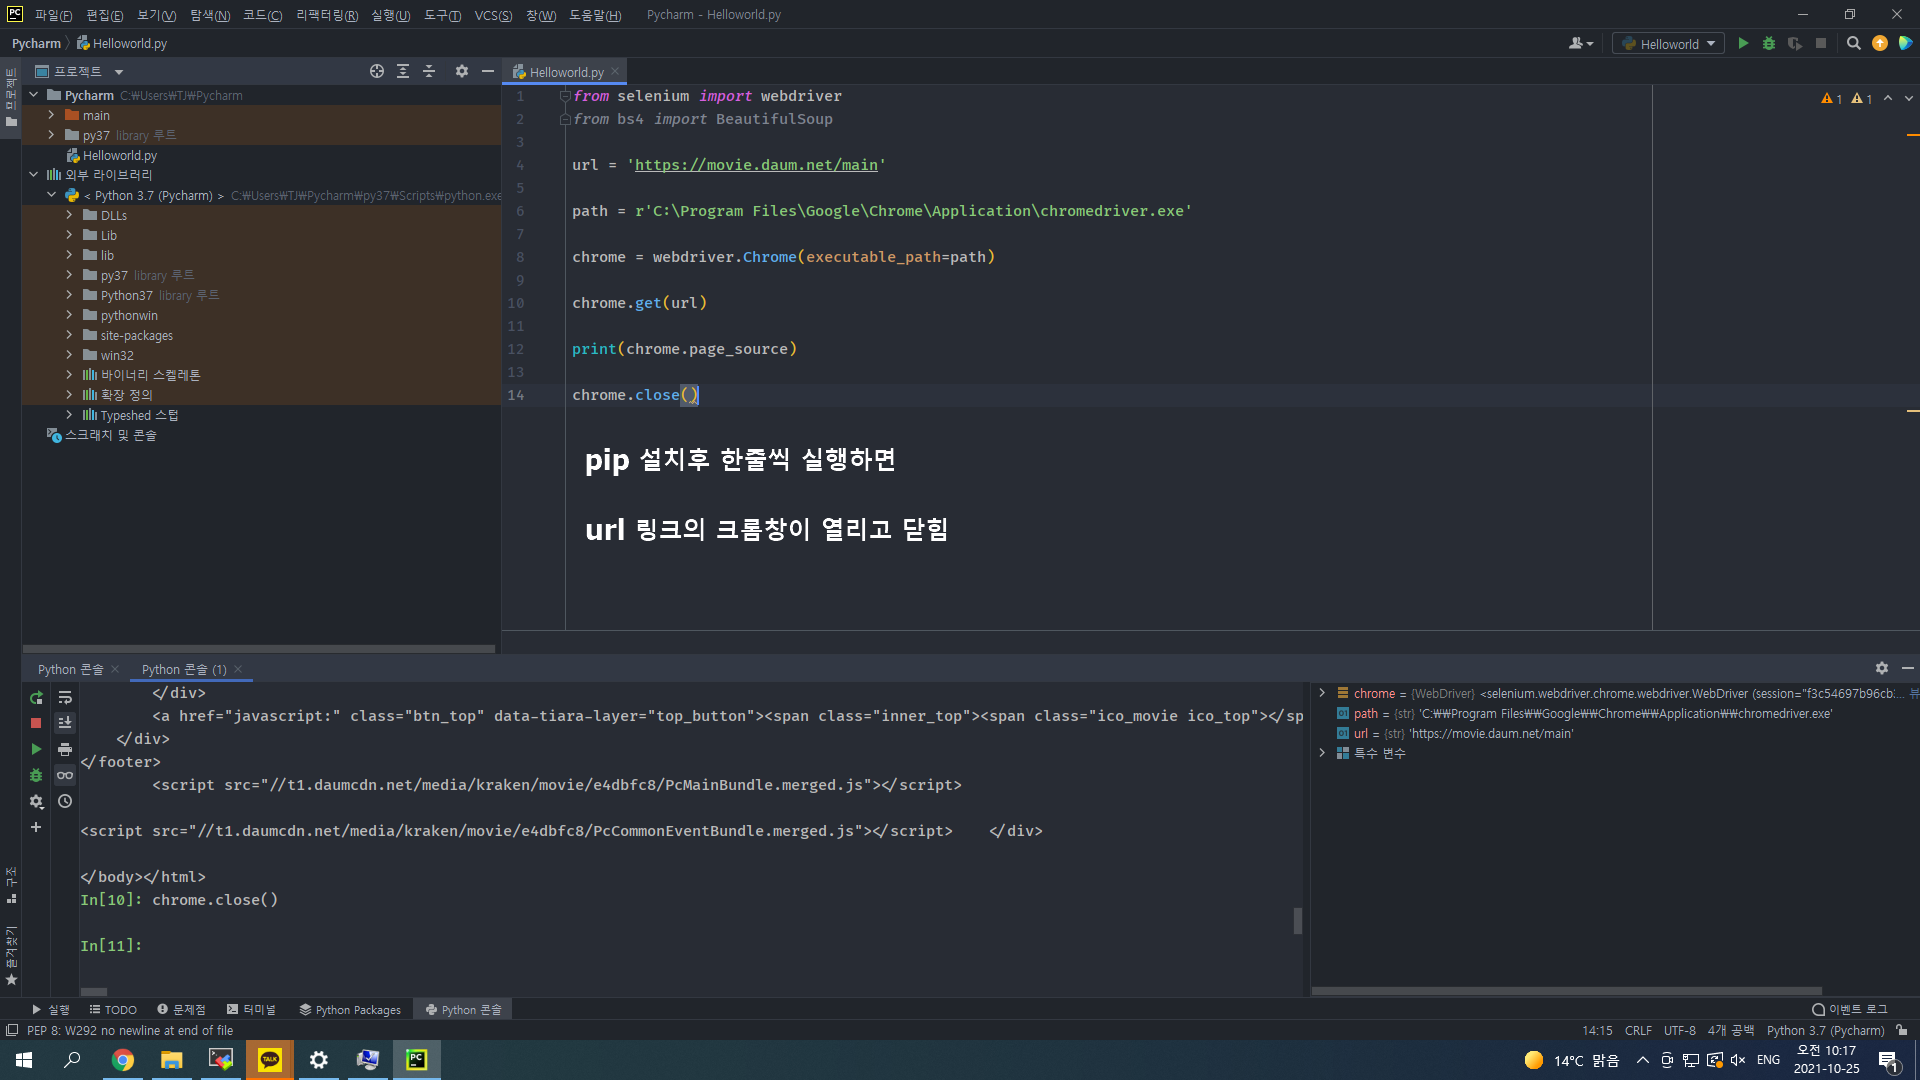

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options

In [3]:
# 다음 영화 사이트( https://movie.daum.net/main )에서 영화제목, 평점, 예매율 추출하기
url = 'https://movie.daum.net/main'

In [4]:
# headless를 위한 설정
options = Options()
options.add_argument('--headless')

In [18]:
# # 크롬 웹드라이버 설정 (1) -> 윈도우용
# path = r'C:\Program Files\Google\Chrome\Application\chromedriver.exe'
# # chrome = webdriver.Chrome(executable_path=path)
#chrome = webdriver.Chrome(executable_path=path, options=options)

In [33]:
# 크롬 웹브라우저 실행 (2) -> 리눅스용
# 1. 리눅스용 크롬 웹브라우저 설치
# wget https://dl.google.com/linux/direct/google-chrome-stable_current_x86_64.rpm

# 2. 리눅스용 크롬 드라이버 설치
path = "/home/hadoop/chromedriver"
chrome = webdriver.Chrome(executable_path=path, options=options)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  import sys


In [26]:
# 지정한 url로 접속
chrome.get(url)

In [27]:
# 응답받은 소스 출력
# print(chrome.page_source)
res = chrome.page_source

In [28]:
# 크롬 종료
chrome.close()

In [29]:
# 읽어들인 페이지소스를 BeautifulSoup으로 파싱
html = BeautifulSoup(res, 'lxml')

In [30]:
# 영화제목 추출
for title in html.select('strong.tit_item a'):
    print(title.text)

이터널스
듄
베놈 2: 렛 데어 비 카니지
고장난 론
아네트
애프터: 관계의 함정
더 하더 데이 폴
바다 탐험대 옥토넛 : 육지수호 대작전
할로윈 킬즈
당신은 믿지 않겠지만
라스트 듀얼: 최후의 결투
기적
그림자꽃
007 노 타임 투 다이
보이스
발신제한
미드나이트
비밀
나의 PS 파트너
샤크 : 더 비기닝
무수단
세자매
파이프라인
극장판 명탐정 코난 : 탐정들의 진혼가
명탐정 코난 : 베이커가의 망령
극장판 짱구는 못말려: 격돌! 낙서왕국과 얼추 네 명의 용사들
애프터: 그 후
조제, 호랑이 그리고 물고기들
모가디슈
애프터
베놈
졸트
극장판 짱구는 못말려: 신혼여행 허리케인~ 사라진 아빠!
싱크홀
극장판 귀멸의 칼날: 무한열차편


In [31]:
# 영화평점 출력
for rate in html.select('span.txt_append span:first-child'):
    print(rate.text)

8.7
6.9
5.9
10.0
9.1
9.3
0.0
10.0
6.9
8.2
8.8
8.8
7.0
5.8
8.4


In [32]:
# 영화예매율 출력
for resrv in html.select('span.txt_append span:last-child'):
    print(resrv.text)

43.1%
24.5%
9.1%
4.3%
3.3%
1.8%
1.5%
1.1%
1.0%
0.9%
0.8%
0.7%
0.7%
0.6%
0.4%
